#PRAKTIKUM SISTEM MULTIMEDIA PT(3)

Nama: Catherine V. Pang

NRP/Prodi: 2C22200008 Sains Data VI/A

Tanggal: Jumat, 10 Maret 2025

Materi: Implementasi Digital Signal Processing untuk Data Audio dari Library Librosa

Rincian Aktivitas Tugas:
- Menerapkan Algoritma DSP untuk data suara lainnya dari Library Librosa.
- Menambahkan noise (suara bising).
- Menormalkan sinyal audio.
- Menerapkan low-pass filter (mengurangi noise).
- Menampilkan bentuk gelombang dan spektrum frekuensi hasil pemrosesan.

# **TEORI DASAR DAN CONTOH MODEL DSP**

## Apa itu Digital Signal Processing (DSP)?

Digital Signal Processing (DSP) adalah proses pengolahan sinyal menggunakan komputer atau perangkat digital untuk:

* memperbaiki kualitas sinyal,
* menganalisis karakteristiknya, atau
* mengubah sinyal sesuai kebutuhan.

Dalam konteks sinyal audio, DSP bertujuan untuk mengolah suara agar:

* lebih bersih (mengurangi noise),
* lebih seragam (melalui normalisasi),
* atau lebih mudah dianalisis (mengubah ke domain frekuensi).




## Konsep Dasar DSP yang Digunakan di Praktikum

1. Sampling & Representasi Sinyal
  * Audio digital adalah hasil dari sinyal suara analog yang di-sampling pada interval waktu tertentu.
  * Hasilnya adalah array angka (nilai amplitudo), yang bisa dianalisis dan dimanipulasi dengan Python.
2. Normalisasi
  * Proses mengatur nilai amplitudo sinyal agar berada dalam rentang tertentu (misalnya -1 hingga 1).
  * Tujuannya agar sinyal tidak terlalu kecil atau terlalu besar saat diproses.
3. Filtering (Low-pass Filter)
  * Teknik sederhana untuk mengurangi noise (suara mengganggu).
  * Low-pass filter menyaring sinyal agar hanya frekuensi rendah yang lewat → biasanya bagian penting dari sinyal suara.
4. Transformasi Fourier (FFT)
  * Mengubah sinyal dari domain waktu (waktu vs amplitudo) ke domain frekuensi (frekuensi vs magnitudo).
  * Membantu kita mengetahui frekuensi-frekuensi dominan dalam sebuah audio (misalnya suara manusia, musik, atau noise).

Catatan:

Dalam analisis data suara, kita memiliki dua domain yang berbeda untuk merepresentasikan suara: domain waktu dan domain frekuensi.

Domain Waktu (Time Domain):

- Domain waktu adalah representasi suara dalam bentuk amplitudo yang berubah-ubah terhadap waktu.
- Dalam domain waktu, suara direpresentasikan sebagai sinyal yang memiliki amplitudo yang berbeda-beda pada setiap titik waktu.
- Grafik domain waktu menunjukkan amplitudo suara terhadap waktu, sehingga kita dapat melihat bagaimana suara berubah-ubah sepanjang waktu.

Domain Frekuensi (Frequency Domain):

- Domain frekuensi adalah representasi suara dalam bentuk komponen-komponen frekuensi yang membentuk suara.
- Dalam domain frekuensi, suara direpresentasikan sebagai spektrum frekuensi yang berisi informasi tentang distribusi energi suara pada berbagai frekuensi.
- Grafik domain frekuensi menunjukkan magnitudo (besarnya energi) suara pada setiap frekuensi, sehingga kita dapat melihat bagaimana energi suara didistribusikan pada berbagai frekuensi.

Kita memiliki dua domain ini karena suara dapat dianalisis dan diproses dalam dua cara yang berbeda:

- Dalam domain waktu, kita dapat melihat bagaimana suara berubah-ubah sepanjang waktu, sehingga kita dapat menganalisis pola-pola temporal suara.
- Dalam domain frekuensi, kita dapat melihat bagaimana energi suara didistribusikan pada berbagai frekuensi, sehingga kita dapat menganalisis komponen-komponen frekuensi suara.

Dengan menggunakan kedua domain ini, kita dapat melakukan analisis dan pengolahan suara yang lebih efektif dan efisien, seperti:

- Filtering (penyaringan) suara untuk menghilangkan noise atau komponen-komponen yang tidak diinginkan.
- Analisis spektrum suara untuk mengidentifikasi komponen-komponen frekuensi yang terkait dengan suara tertentu.
- Kompresi suara untuk mengurangi ukuran file suara.

Jadi, kedua domain ini sangat penting dalam analisis dan pengolahan suara, dan kita dapat menggunakan keduanya untuk mendapatkan informasi yang lebih lengkap tentang suara.

## Import Library

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


## Memuat dan Memutar File Audio

Librosa digunakan untuk memuat file audio dalam bentuk array.
Audio pada komputer adalah representasi digital dari sinyal analog.

Penjelasan Kode:
* y adalah array 1D berisi data sinyal audio.
* sr adalah sample rate (berapa kali per detik sinyal diambil).

In [ ]:
y, sr = librosa.load(librosa.example('trumpet'))

noise = 0.01 * np.random.randn(len(y))
y_noisy = y + noise

display(Audio(y_noisy, rate=sr))

## Visualisasi Gelombang Audio

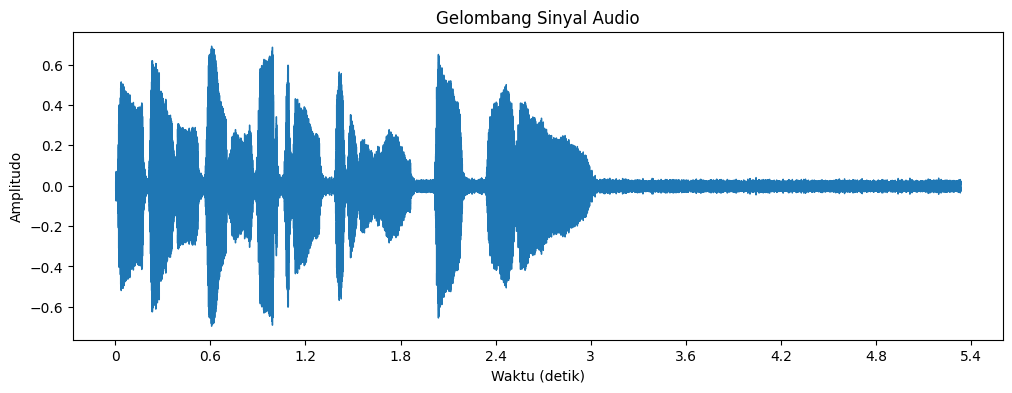

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_noisy, sr=sr)
plt.title("Gelombang Sinyal Audio")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()


### Penjelasan Grafik Gelombang Sinyal Audio

Sumbu Horizontal (X-axis): Waktu (dalam detik)
* Menunjukkan durasi audio.
* Misalnya, dari 0 detik hingga sekitar 5.4 detik.
* Artinya: kita sedang melihat potongan audio sepanjang 5.4 detik.

Sumbu Vertikal (Y-axis): Amplitudo
* Menunjukkan kekuatan (intensitas) sinyal pada waktu tertentu.
* Nilainya biasanya berkisar antara -1 hingga 1 (jika sudah dinormalisasi).
* Semakin tinggi nilai absolut amplitudo, semakin kuat volume pada titik waktu itu.

Bentuk Gelombang (Waveform)
* Pola gelombang ini mencerminkan variasi amplitudo terhadap waktu.
* Bagian dengan gelombang padat dan tinggi: menunjukkan suara yang keras atau kompleks (banyak frekuensi).
* Bagian dengan gelombang kecil dan datar: suara lemah atau senyap, atau bahkan hanya noise rendah.

## Normalisasi Amplitudo

Normalisasi berguna untuk menyesuaikan level volume audio agar tidak terlalu kecil atau terlalu besar.

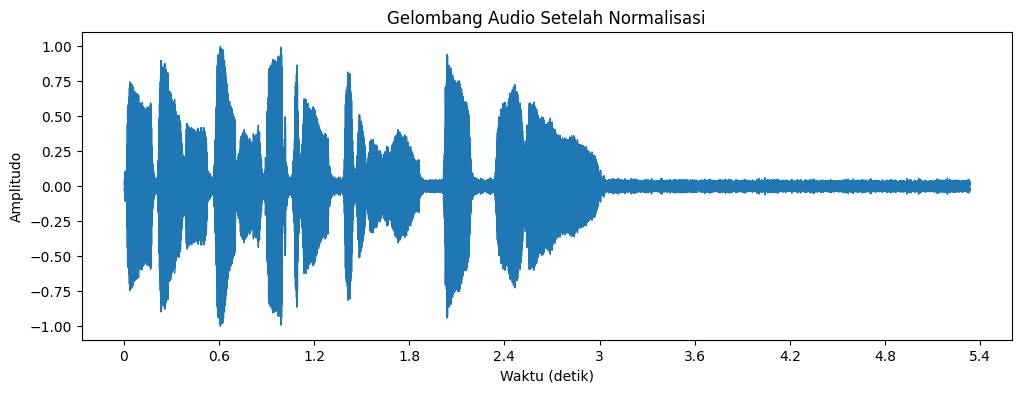

In [ ]:
y_norm = y_noisy / np.max(np.abs(y_noisy))  # normalisasi ke rentang [-1, 1]


plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Gelombang Audio Setelah Normalisasi")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()


In [ ]:
display(Audio(y_norm, rate=sr))

### Apa yang Terjadi di Grafik Ini?

* Gelombangnya kini mengisi sumbu vertikal hingga maksimum ±1 → artinya normalisasi sudah berhasil.
* Bagian awal sampai detik 3 tampak lebih “terbuka” dan dominan → karena volume sudah ditingkatkan.
* Bagian setelah detik 3 tetap kecil → menunjukkan bahwa bagian itu memang benar-benar beramplitudo rendah,hanya noise kecil.

## Noise Reduction Sederhana (Low-pass Filter)

Kita akan menerapkan filter rata-rata (moving average) sederhana untuk mengurangi noise.

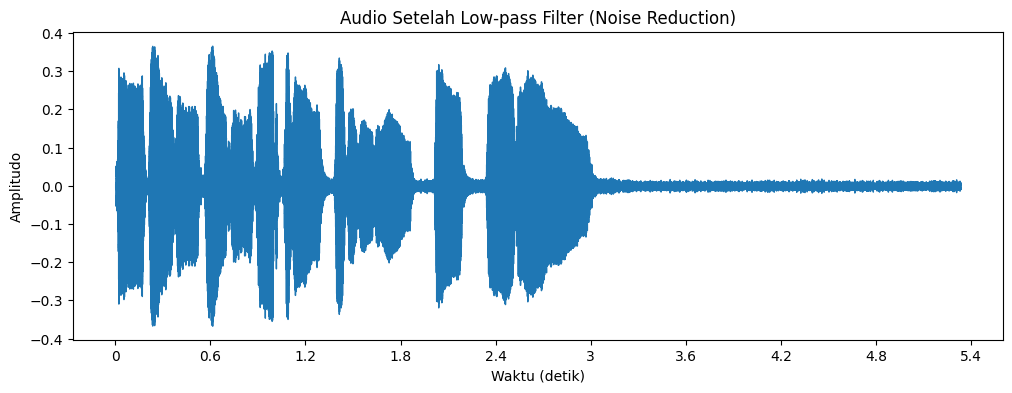

In [ ]:
def low_pass_filter(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

y_filtered = low_pass_filter(y_norm, window_size=10)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_filtered, sr=sr)
plt.title("Audio Setelah Low-pass Filter (Noise Reduction)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()


In [ ]:
display(Audio(y_filtered, rate=sr))

## Analisis Grafik

Amplitudo Turun
* Terlihat jelas bahwa amplitudo maksimum sinyal berkurang dari sebelumnya (±1 jadi ±0.35).
* Ini wajar karena frekuensi tinggi dihilangkan, dan suara menjadi lebih "halus".

Bentuk Gelombang Masih Terjaga
* Bentuk dasar sinyal masih menyerupai versi sebelumnya → artinya informasi utama suara tidak hilang.
* Ini penting agar filtering tidak merusak sinyal aslinya.

Bagian Akhir Lebih Bersih
* Setelah detik ke-3, bagian yang tadinya tampak agak "berisik", sekarang terlihat lebih datar dan tenang.
* Menunjukkan bahwa noise latar belakang telah berhasil dikurangi.

## Transformasi ke Domain Frekuensi (FFT)

Fourier Transform digunakan untuk melihat komponen frekuensi dari sinyal audio.

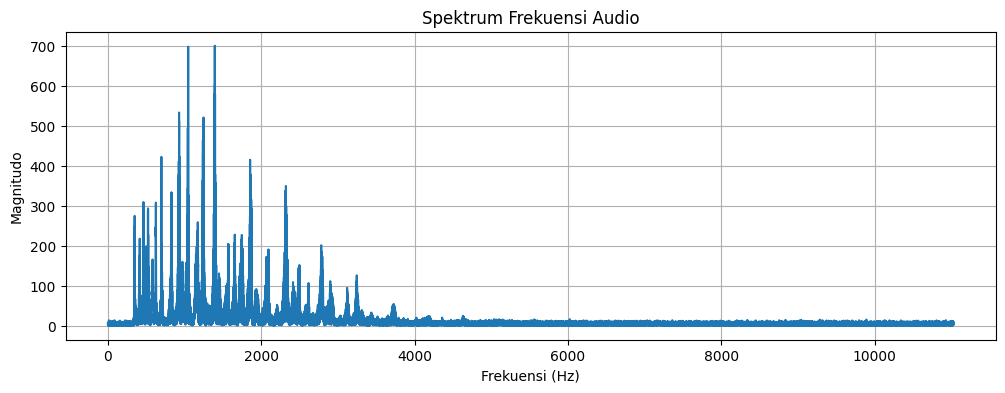

In [ ]:
# Transformasi Fourier
fft_spectrum = np.fft.fft(y_norm)
frequencies = np.fft.fftfreq(len(fft_spectrum), 1/sr)

# Hanya ambil separuh spektrum (simetris)
half_spectrum = fft_spectrum[:len(fft_spectrum)//2]
half_freq = frequencies[:len(frequencies)//2]

plt.figure(figsize=(12, 4))
plt.plot(half_freq, np.abs(half_spectrum))
plt.title("Spektrum Frekuensi Audio")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")
plt.grid()
plt.show()


Grafik FFT yang kamu tampilkan menunjukkan banyak puncak tajam di rentang 0–3000 Hz dan beberapa sampai 7000 Hz — ini khas suara instrumen

#**PENGERJAAN TUGAS**

## Instruksi Tugas:

Implementasikan DSP untuk audio berikut

In [ ]:
#LOAD LIBRARY AND MODULE
import librosa                    #Library untuk analisis dan pemrosesan audio.
import librosa.display            #Modul visualisasi khusus audio dari librosa.
import matplotlib.pyplot as plt   #Library untuk membuat grafik dan visualisasi.
import numpy as np                #Library untuk komputasi numerik (array, matematika, FFT, dll).
from IPython.display import Audio #Untuk menampilkan dan memutar audio di notebook.

In [ ]:
#LOAD AUDIO SAMPLE
y, sr = librosa.load(librosa.example('libri1'))   # y  → array 1D berisi data audio (amplitudo sinyal).
                                                  # sr → sample rate (frekuensi pengambilan sampel, dalam Hz).

#GENERATE NOISE DAN CAMPURKAN DENGAN AUDIO
noise = 0.1 * np.random.randn(len(y))             # noise → Membuat array noise acak dari distribusi Gaussian (mean = 0, std = 1).
                                                  #         Panjang array noise sama dengan panjang sinyal asli.

y_noisy = y + noise                               # y_noisy ← y + (0.1 * noise)
                                                    # Penjelasan:
                                                    # Menambahkan noise ke sinyal asli.
                                                    # Skala noise dikalikan 0.1 agar tidak terlalu kuat.
#PLAY AUDIO DENGAN NOISE
display(Audio(y_noisy, rate=sr))                 #  Menampilkan pemutar audio untuk mendengarkan sinyal yang sudah diberi noise.

Audio tersebut berisi suara seorang pria yang sedang berbicara dalam bahasa Inggris dan telah ditambahkan suara noise ke dalam data audio tersebut.

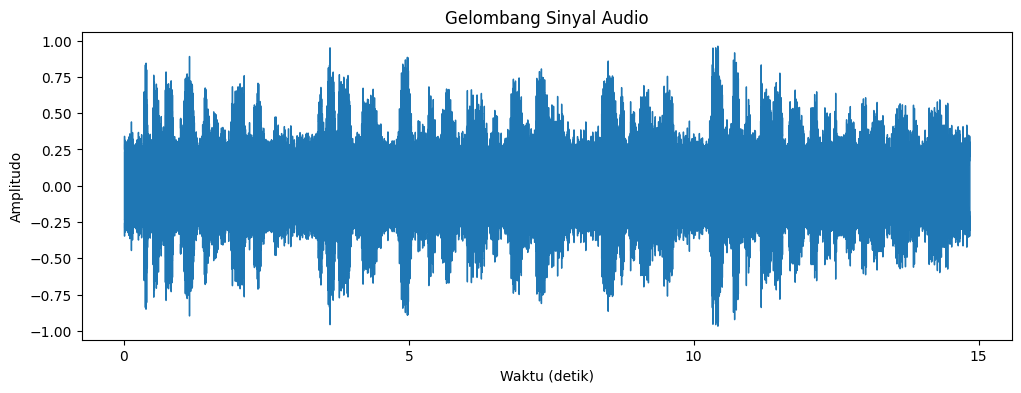

In [ ]:
#AMPILKAN WAVEFORM AUDIO BERNOISE

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_noisy, sr=sr)
plt.title("Gelombang Sinyal Audio")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

### **Penjelasan "Grafik Gelombang Sinyal Audio"**
____

**Sumbu Horizontal (X-axis): Waktu (dalam detik)**  
- Menunjukkan durasi dari potongan audio yang dianalisis.  
- Terlihat mencakup durasi sekitar 15 detik.  
- Artinya, kita sedang mengamati bentuk gelombang suara manusia selama 15 detik penuh.

**Sumbu Vertikal (Y-axis): Amplitudo**  
- Menggambarkan kekuatan sinyal audio pada tiap waktu.  
- Rentang nilai berkisar dari -1 hingga 1 → ini umum terjadi jika sinyal sudah melalui proses normalisasi awal.  
- Amplitudo tinggi menunjukkan bagian dengan suara keras, sedangkan amplitudo rendah cenderung lebih tenang atau senyap.

**Bentuk Gelombang (Waveform)**  
- Pola naik turun menandakan perubahan energi suara yang dihasilkan oleh pembicara.  
- Bagian gelombang padat dan rapat menunjukkan bagian yang dominan bicara atau ekspresif.  
- Area yang lebih datar atau lemah bisa menandakan jeda, napas, atau noise latar belakang.

**Apa yang terjadi?**
- Suara asli tampak bervariasi dalam amplitudo, beberapa bagian lebih padat (bicara aktif), bagian lainnya lebih datar (hening atau noise rendah).  
- Tidak ada clipping → sinyal berada dalam rentang aman.  
- Karakteristik khas suara manusia masih tampak jelas.

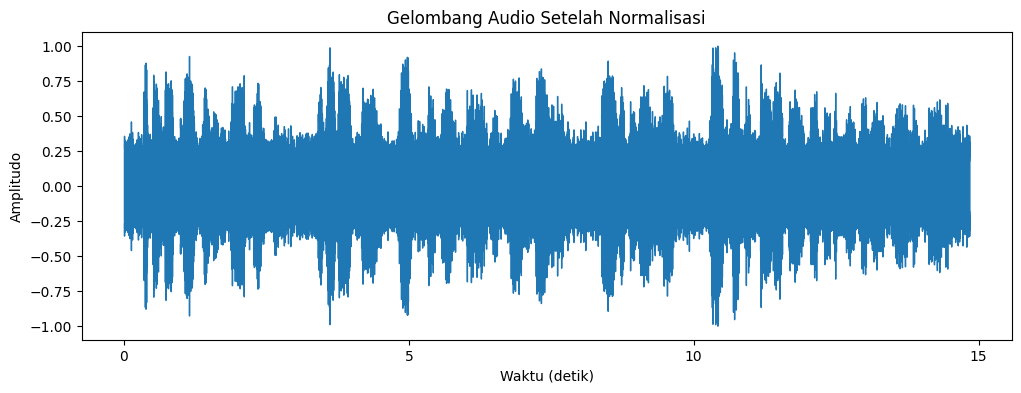

In [ ]:
# NORMALISASI SINYAL AUDIO
y_norm = y_noisy / np.max(np.abs(y_noisy))  # normalisasi ke rentang [-1, 1]
                                            # np.abs() → Mengambil nilai absolut (karena sinyal bisa bernilai negatif).
                                            # np.max()   → Cari nilai maksimum dari sinyal.
                                            # Pembagian ini menyesuaikan sinyal ke rentang [-1, 1].
#TAMPILKAN WAVEFORM SETELAH NORMALISASI
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_norm, sr=sr)
plt.title("Gelombang Audio Setelah Normalisasi")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

### **Penjelasan "Grafik Gelombang Audio Setelah Normalisasi"**
____
- Sekarang sinyal menjangkau batas atas dan bawah amplitudo (±1) → menunjukkan bahwa amplitudo sudah diperkuat secara proporsional.  
- Bagian-bagian lemah menjadi sedikit lebih tampak → membantu meningkatkan keterbacaan sinyal bicara pada bagian yang awalnya lemah.  
- Ini penting dalam praproses sebelum fitur audio (seperti MFCC atau spectrogram) diekstraksi.


In [ ]:
#PLAY AUDIO NORMALISASI
display(Audio(y_norm, rate=sr))

Walaupun telah dilakukan normalisasi, belum terasa perubahan noise yang signifikan. Nampaknya data suara asli telah dinormalisasi sebelumnya. Maka dilakukanlah Noise Reduction menggunakan Fungsi Low-Pass Filter.

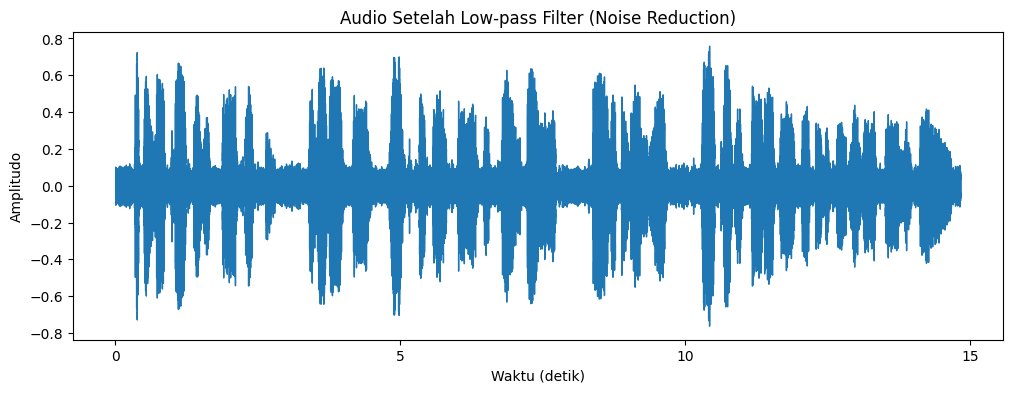

In [ ]:
#NOISE REDUCTION
#DEFINISI LOW-PASS FILTER (fungsi)
def low_pass_filter(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

  '''
  Fungsi Low Pass Filter:
   - Filter rata-rata bergerak (moving average)
   - Digunakan untuk menghaluskan sinyal (mengurangi noise frekuensi tinggi)
   - return np.convolve(signal, np.ones(window_size) / window_size, mode='same')
   '''
     #Penjelasan:
    #np.ones(window_size) → Array berisi 1 sebanyak `window_size`
    #Dibagi window_size → Normalisasi bobot filter.
    #np.convolve(..., mode='same') → Operasi konvolusi, hasilkan array dengan ukuran sama seperti sinyal asli.

#TERAPKAN FILTER KE AUDIO NORMALISASI
y_filtered = low_pass_filter(y_norm, window_size=10)

#TAMPILKAN WAVEFORM SETELAH FILTERING
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_filtered, sr=sr)
plt.title("Audio Setelah Low-pass Filter (Noise Reduction)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

### **Penjelasan Grafik "Gelombang Audio Setelah Low-pass Filter (Noise Reduction)"**
____

- Terjadi penurunan amplitudo maksimal → karena frekuensi tinggi (noise) berhasil ditekan.  
- Sinyal terlihat lebih “halus”, dengan bentuk dasar masih serupa dengan aslinya.  
- Noise latar, termasuk napas atau gesekan ringan, dikurangi tanpa mengorbankan bagian penting dari sinyal suara.  
- Bagian akhir audio (detik ke-12 ke atas) tampak jauh lebih bersih dan tenang.


In [ ]:
#PLAY AUDIO FILTERED
display(Audio(y_filtered, rate=sr))

Setelah diterapkan Low Pass Filter, audio yang sebelumnya dinormalisasi beserta noisenya, terdengar menjadi lebih teredam baik suara utama (orang berbicara) maupun suara noisenya. Alih-alih memisahkan suara noise dari suara utama, tetapi suara utama malah ikut teredam sehingga kejelasan suaranya berkurang.

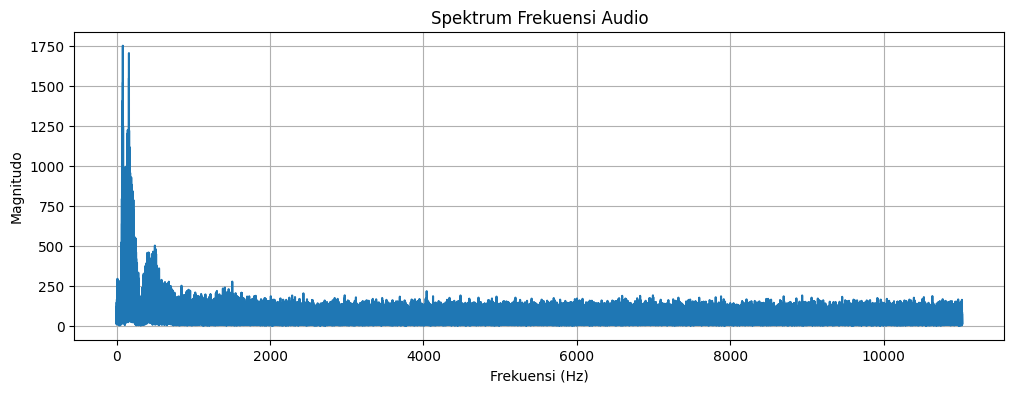

In [ ]:
# TRANSFORMASI FOURIER UNTUK SPEKTRUM FREKUENSI
fft_spectrum = np.fft.fft(y_norm)                       #Mengubah sinyal dari domain waktu ke domain frekuensi.
                                                        #Hasil berupa array bilangan kompleks (mengandung info amplitudo & fasa).
frequencies = np.fft.fftfreq(len(fft_spectrum), 1/sr)

# Hanya ambil separuh spektrum (simetris)
half_spectrum = fft_spectrum[:len(fft_spectrum)//2]
half_freq = frequencies[:len(frequencies)//2]

plt.figure(figsize=(12, 4))
plt.plot(half_freq, np.abs(half_spectrum))
plt.title("Spektrum Frekuensi Audio")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")
plt.grid()
plt.show()


### **Analisis Grafik "Spektrum Frekuensi Audio"**
____

- Spektrum menunjukkan dominasi sinyal pada frekuensi rendah hingga menengah (sekitar 100–3000 Hz), yang memang khas untuk suara manusia.  
- Puncak tajam di bawah 1000 Hz bisa mengindikasikan formant suara vokal dasar (F0, F1).  
- Energi mulai menurun drastis di atas 4000 Hz → efek dari low-pass filter yang mengurangi gangguan frekuensi tinggi.  
- Ini menunjukkan bahwa sebagian besar informasi penting tetap terjaga, sementara elemen frekuensi tinggi (noise, desis mikrofon) telah ditekan secara efektif.

**Kesimpulan**

Pemrosesan audio melalui normalisasi dan filter low-pass berhasil meningkatkan kualitas sinyal suara:  
- **Normalisasi** membuat sinyal lebih seragam dalam hal energi,  
- **Low-pass filter** membersihkan sinyal dari gangguan tinggi tanpa merusak informasi penting,  
- **Spektrum frekuensi** menunjukkan bahwa suara manusia tetap dominan di rentang khasnya, membuktikan bahwa proses filtering berhasil menjaga karakteristik aslinya.

Data audio aslinya sudah dinormalisasi karena rentang datanya telah berada pada skala 1 sampai -1 sehingga jika dinormalisasi lagi, tidak terasa pengaruhnya. Setelah pemrosesan DSP, audio yang telah direkayasa dengan ditambahkan noise buatan, belum benar-benar bersih dari noise. Kemudian suara orang berbicara dan suara noise sama-sama teredam yang berakibat pada berkurangnya kejelasan suara utama (orang berbicara).